# Transformada de Fourier 

Transformada de fourier discreta 

$X_k = \sum_{n=0}^{N-1} x_n \cdot e^{-i 2 \pi k n /N} $

Transformada inversa de fourier discreta 

$x_n = (1/N) \sum_{n=0}^{N-1} X_k \cdot e^{i 2 \pi k n /N} $

Referencias: 
https://plot.ly/matplotlib/fft/
https://jakevdp.github.io/blog/2013/08/28/understanding-the-fft/

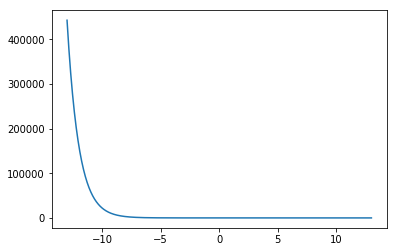

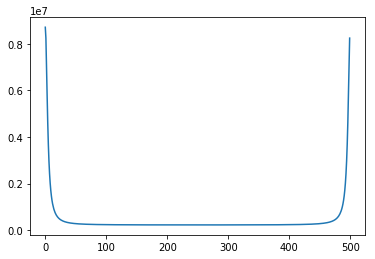

1 loop, best of 3: 424 ms per loop
1000 loops, best of 3: 121 µs per loop


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from random import random
import scipy.fftpack
%matplotlib inline

x = np.random.random(1000) #aleatorios
N = 500

def DFT_slow(x): #transformada discreta de fourier
    x = np.asarray(x, dtype=float) #arreglo en 1D
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

t = np.linspace(-13,13,500) 
r = np.exp(-t) #funcion a hacer transformada

#Funcion exponencial para hacer transformada
plt.plot(t,r) 
plt.show()


#Transformada de la funcion exponencial
F = DFT_slow(r) 
plt.plot(F)
plt.show()

#tiempos de ciclos
%timeit DFT_slow(x) 
%timeit np.fft.fft(x)

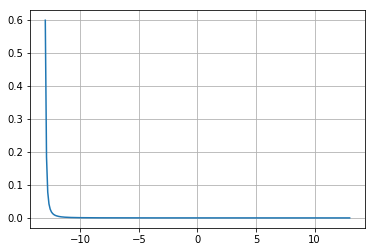

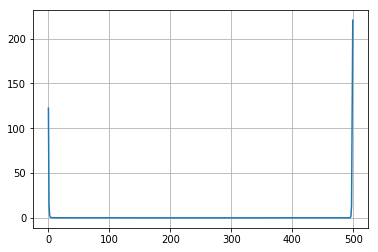

In [9]:
#Igual al codigo anterior pero con la transformada de fourier rapida
from scipy.fftpack import fft

# Numero de puntos en muestra
N = 500
n = np.arange(N)
# Espacio de la muestra
T = 1.0 / 500.0
x = np.linspace(0.0, N*T, N)
y = np.exp(-2j * np.pi * x * n / N)
#transformada de fourier rapida
yf = fft(y)
xf = np.linspace(-13.0, 13.0, N//2)
import matplotlib.pyplot as plt
#grafica de funcion
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()
#grafica de transformada 
plt.plot(yf)
plt.grid()
plt.show()